# Midterm - DS2000B and IS2002B

## Student ID: XXXXXXXXX (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the first six Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to documents that are shared - i.e. on google docs or dropbox - or communicate in any other way with anyone (real or AI-agent such as chatGPT) inside or outside the class during the midterm. ** To finish the midterm in the alloted 1hr and 50min, you will have to work efficiently. **Read the entirety of each question carefully.** 

You need to submit the midterm by the due date (12:20) on OWL under Assignments/Midterm. Late submission will be scored with 0 pts, unless you have received extra accommadation. So please start your submission five minutes before the deadline!  

### Additional Guidance

The midterm is supposed to be challenging. If you get stuck on a particular question because you can't solve a programming problem, just write down in text *how* you would try to solve the problem - if correct this can give you partial points. Then continue the other parts of the question, the next question, or next task. The midterm is designed, such that the solutions do not require that the previous question is solved correctly. 
If you need the solution from a previous problem, just *assume* some outcome and answer the question under that assumption. If you do this, make your assumptions explicit. 

Read all the questions carefully. Each questions demands a written answer as part of it. These need to be spelled out in a whole English sentence. 

In [1]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, and seaborn. 

### You are not allowed to rely on any other packages or modules.  

import matplotlib
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np
import seaborn as sb
import scipy.stats as ss

## Data set
Transcranial direct current stimulation (tDCS) is a form of electrical brain stimulation. It send a weak electric current through the brain. tDCS is thought to increase brain plasticity if it is applied during behavioral training  

In 2012, our lab conducted a study looking at the causal effect of tDCS during motor sequence learning. Participant where a ad-hoc sample from the undergraduate population at UCL (University College London). Participants had to type out sequences of 5 numbers as fast as possible on a keyboard. First, they were tested before training (pre-test). We recorded both average movement time (MT), i.e. how many seconds they required to complete the 5 key presses, and the proportion of trials with an error (Error). To reduce the differences in preexisting performance, we decided to admit only participants that could do the task at pretest reasonably well (Movement time < 3.6s) to the main study. This led to the exclusion of 15 participants (not in the dataset).

Half of these participants were randomly assigned to a experimental group, and the other half to the control group. We decided to block for gender in this experiment, but no other variable. All participants trained the task for 4 consecutive days for 60min each with the left hand. During training, we attached two electrodes to their head. For the experimental group a current was sent between electrodes. The control group received only a brief stimulation, so they also experienced the initial tingle on the scalp, but after that the current was switched off. When interviewed afterwards, participants were not better at chance at guessing whether they were assigned to the tDCS or Control group.  

The Data frame contains the following variables. 

1. SN - Subject Number 
2. age - Age of the Subject at time of testing in years 
3. gender - Gender of subject: 'F':female or 'M':male 
4. hand - performing hand 1=left 2=right (you have only left hand data here)
5. tDCS - 1 = Experimental group, 0 = control group  
5. Error_pre: Proportion of error trials at pre-test 
6. Error_post: Proportion of error trials at post-test
7. MT_pre: average Movement time at pre-test  
8. MT_post: average Movement time at post-test

**REFERENCE**: 
Waters-Metenier, S., Husain, M., Wiestler, T., & Diedrichsen, J. (2014) Bihemispheric tDCS enhances effector-independent representations of motor synergy and sequence learning. Journal of Neuroscience.

All details required to answer this midterm are given in this Jupyter notebook - no information from the (more complex) original study is required. 


**WARNING**: While this is a real result and has been replicated a number of times, other studies have found smaller or no effect of tDCS on motor learning. Therefore the overall efficacy of this treatment is still a matter of debate. Also, tDCS is only safe when applied with medically approved equipment and by trained personnel - so please do not try this at home.    

## Task 1: Descriptors  

### Question 1.1 (5 pts)
Load the data file `tDCS_study_data.csv`. Find the participant with the slowest movement time at pre-test (MT_pre) and print out the corresponding row of the data frame),

*Written answer*: report their MT_pre, their age, and gender (in a full English sentence)

In [2]:
D=pd.read_csv('tDCS_study_data.csv') # 1pt
this_max=max(D.MT_pre)                    
print(D[D.MT_pre==this_max]) #1     

   SN  age gender  hand  tDCS  Error_pre  Error_post  MT_pre  MT_post
7  10   23      M     1     1    0.03125     0.09375   3.582  0.86422


Tbe person has a pre-test MT of 3.582s, is male, and 23 years old.  (#1pt for each correct information item)

### Question 1.2 (7 pts)
Print a table that shows the number of males and females participants assigned to the Experimental (tDCS) and Control group respectively. (3pts)

*Written answer*: What is the cause of this particular distribution of males / females across the two groups? (4pts)

*Hint*: see description of dataset for possible clues

In [3]:

pd.crosstab(D.tDCS,D.gender) # (3pts)

gender,F,M
tDCS,,
0,6,6
1,6,6


There are 6 males and 6 females in the experimental and tDCS control group. This is because the researchers **blocked** for gender in their design - that is they assigned males and females participants evenly across the two groups.  (4pts)

### Question 1.3 (7pts)
Plot a histogram of the pretest-MT using 9 bins

How would describe the shape of the distribution? What may be the reason for this particular shape of the distribution?

*Hint*: see description of dataset for possible clues



<AxesSubplot:xlabel='MT_pre', ylabel='Count'>

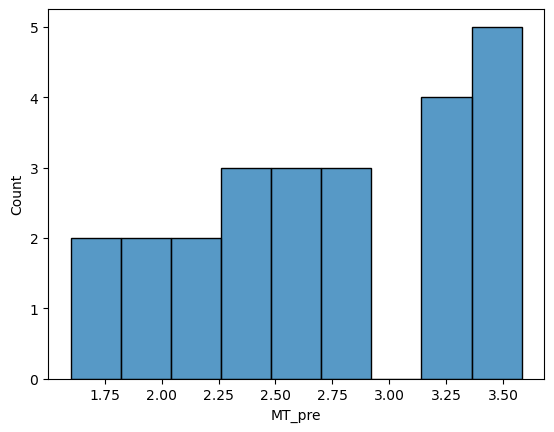

In [4]:
sb.histplot(D.MT_pre,bins=9) # (2pts)

The distribution of pre-movement time has a left-skewed distribution. (2pts) 
*Alternative, but less accurate answer:*
The distribution may be described as bi-modal. Note that this only gives 1/2 pts. 


One reason for the right tail is missing is likely that participants with MT > 3.6s were not admitted to the main experiment. (3pts)

### Question 1.4 (9pts)

Generate a boxplot of the pre-MT, with separate boxes for the experimental and control group. (2pts)

*Written answer*: Which group performed faster at pre-test? (2pts)

*Written answer*: Assume that the authors then used a randomization test to test for the effect of tDCS onto the post-test test performance. They found a significant group difference with p=0.01. 
Given the observed differences at pre-test, do you think you can still meaningfully interpret this p-value? That is, can the authors still reject the Null-hypothesis that tDCS has no influence on post-test performance? (5pts)

<AxesSubplot:xlabel='tDCS', ylabel='MT_pre'>

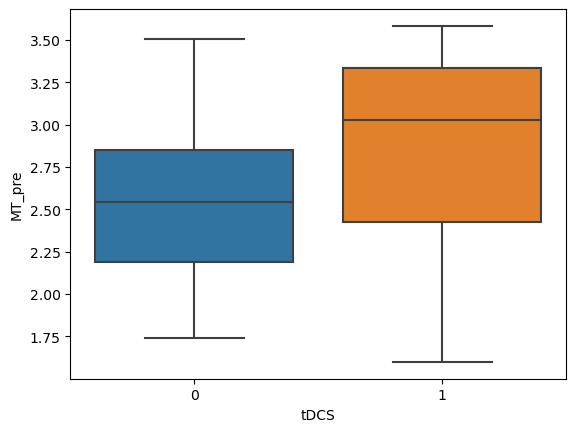

In [5]:
sb.boxplot(data=D,x='tDCS',y='MT_pre') # 2pts

The TDCS group performed on average slower at pre-test.  (2pts)

Even though the groups are slightly different at pre-test, the p-value is still valid, as the participants were **randomly assigned** to the treatment group. So any pre-test differences will be accounted for in the randomization test.  (5pts for relying on randomization argument. Some students may point out that the tdcs group is actually slower before and so goes in favor of the Null - this can maximally get 2pts)

### Question 1.5 (6pts)

Generate a boxplot of the MT_post, with separate boxes for the experimental and control group. (2pts)

**Written answer**: Was the 25th percentile of MT_post for the control group smaller or larger than 75th percentile of MT_post for the experimental group? (4pts)

<AxesSubplot:xlabel='tDCS', ylabel='MT_post'>

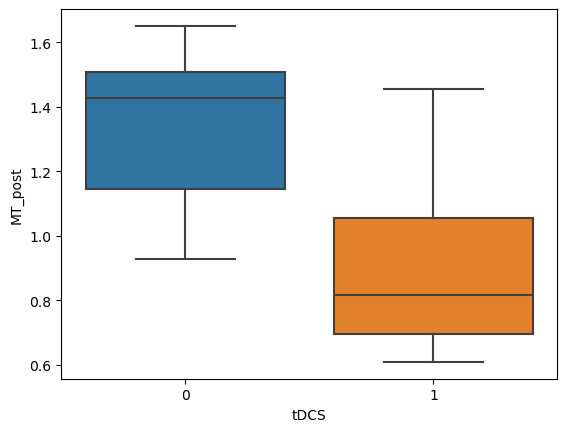

In [6]:
sb.boxplot(data=D,x='tDCS',y='MT_post') # (2pt)

The 25th percentile of MT_post for the control group larger (slower) than 75th percentile of MT_post for the experimental group. (4pts) 

## Task 2: Randomization test and experimental inference
### Question 2.1 (8pts)
The authors want to test the hypothesis that the application of tDCS leads to a larger *change* from the pretest MT to post-test MT, as compared to a group that receives no tDCS. 
The authors want to generalize the results to the group that the sample was drawn from (young healthy college students), independent of their exact age and their pre-test performance.  

*Written answer*: Formulate the appropriate Null-hypothesis test. (3pts) 

Under this Null-hypothesis hypothesis, which variable is *exchangeable*? That is, which column in the data frame should you shuffle to build up a distribution under the Null hypothesis: 

 * Age 
 * MT_pre
 * MT_post
 * tDCS?

Justify why your chosen answer is correct, and why all other answers are incorrect. (5pts)



H0: tDCS has not effect on the change from pretestMT to posttest MT. The difference in MT (pre-post) is the same or smaller in the experimental as compared to the control group. (3pts)

Under the Null-hypothesis, tDCS (Experimental vs. Control) is exchangeable (because this was randomly assigned) and should be shuffled. Note that all other variables are not exchangeable as they were not randomly assigned.  (2pts for the right pick, 3pts for correct justification.)

### Question 2.2 (12pts)
Perform a randomization test to test the hypothesis that the application of tDCS causes the post-test MT to be *lower* in the Experimental as compared to the control group.
First, write a function that returns the mean difference in MT_post between the experimental and control group as your test statistics. 
Then use this function in a randomization test with at least 10000 iterations to build the expected  distribution of this statistics under the Null-hypothesis. 

*Written answer*: Report the observed mean difference, and the p-value for the case that you decided to reject the Null-hypothesis for the observed (or a more extreme) mean difference. Choose carefully between a one-sided and two-sided test. What is the correct interpretation of the p-value?    

*Note*: If you are using functions from a previous homework assignment, include all the necessary code in your answer. 

In [20]:
# 4pts for correct function + result 
def mean_difference(df):  
    A = df.groupby('tDCS').MT_post.mean()
    return A[0]-A[1]

mean_difference(D)

0.46471833333333323

 P-value of the randomisation test is p=  0.0002


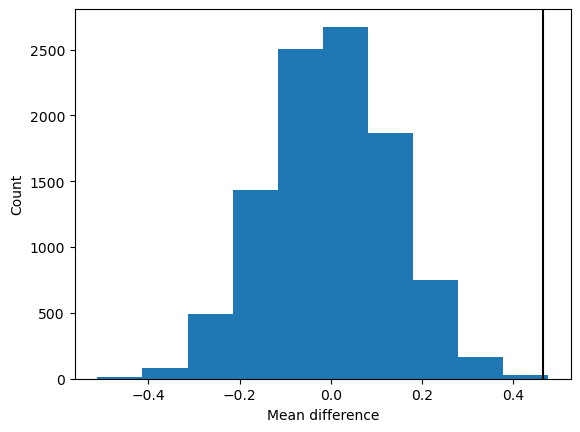

In [8]:
# 3 pts for correct code usage

def randomize_column(df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

def randomization_test(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S= randomize_column(D,shuffle)         
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Calculate the real test statistic 
    realTS = fcn(D)

    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    plt.xlabel('Mean difference')
    plt.ylabel('Count')

    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=np.absolute(realTS))/len(listOfTS)
    print(' P-value of the randomisation test is p= ',p)
    return p,listOfTS

p,l=randomization_test(D,mean_difference,'tDCS',numIterations=10000,sides=1)

The experimental group was on average 460ms faster than the control group. The p-value of 0.0001 indicates that there is only a 1/10000 chance that we would have observed this or a more extreme difference between the groups, if tDCS had no influence on the performance at all. (2 pts for choosing 1-sided test + 3 pts for correct interpretation)

### Question 2.3 (10pts)
Now let's test the Hypothesis that the application of tDCS influences (increases or decreases) the proportion of errors that people make in the post-test. 

First formulate the corresponding Null-hypothesis. (2pts)

Then write a function to return the difference in the proportion of errors between the two groups. (1pts)

What Difference in error rate do you observe between the groups? Which group made more errors? (1pts)

Conduct conduct the appropriate randomization test to determine a p-value, if you had rejected the Null-hypothesis for the observed difference. (4pts)

What is your conclusion about the above Hypothesis? (2pts)

H0: tDCS has no influence on the proportion of errors during the post-test. (2pts)

In [9]:
# 1pt for function 
def error_difference(df):  
    A = df.groupby('tDCS').Error_post.mean()
    return A[0]-A[1]

error_difference(D)

-0.0078125

The error rate for the Experimental group was 0.78% higher than for the control group.   (1pts)

 P-value of the randomisation test is p=  0.7972


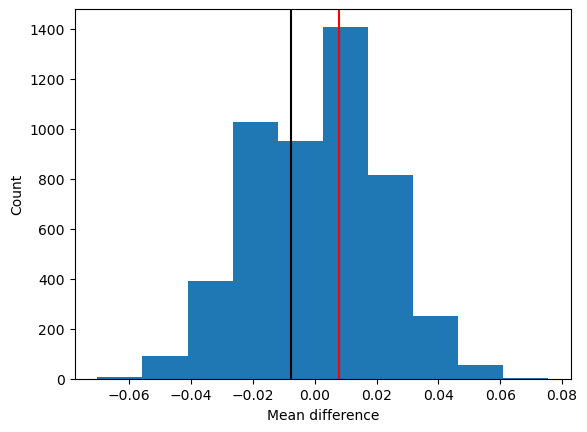

In [10]:
# 4 pts- 3 pts of those to use two-sided test! 
p,l = randomization_test(D,error_difference,'tDCS',numIterations=5000,sides=2)

Based on these results we cannot reject the null hypothesis that tDCS does not influence the number of errors make after training. (2pts)

### Question 2.4 (13pts)
Based on this result, the reviewers of the paper asked for a Bayesian test to determine how strong the evidence for the Null-hypothesis (that tDCS does not cause a difference in Error rate in the Post-test). 

The Null-hypothesis (H0) is that the average error rate difference is normally distributed with mean zero and standard deviation 0.02. 

The alternative hypothesis (H1) is undirected: 
With p=0.5, the error rate difference is normally distributed with mean 0.03 and standard deviation of 0.02
With p=0.5, the error rate difference is normally distributed with mean -0.03 and standard deviation of 0.02. 

What is the Bayes Factor for H0 vs. H1? Is the evidence in favor of the the H0 or H1? How strong is that evidence (according to Kaas & Rafetery's convention)? 

*Hint:* If you have problems solving this for the undirected hypothesis, simply solve it for the directed hypothesis that states that the error rate difference is normally distributed with mean -0.03 (Higher error rate for Experimental than control group) and standard deviation of 0.02. You will loose 5 points, but at least you can show that you can do a Bayesian test (total worth 8pts).   

In [11]:
# 2pts for correct mean diference and std. 
se=0.02 # Standard error of mean difference 
d = error_difference(D) #Mean difference
print('mean difference:',d)

# 2 pts for correct p under H0 
p0 = ss.norm.pdf(d,0,se) # Probability of data under the H0 (p(Data|H0))
print('probability under H0:',p0)

# 6 points for correct p under H1 (1pt if one-sided)
p1 = 0.5* ss.norm.pdf(d,-0.03,se) # Probability of the data under the H1 (p(Data|H1))
+ 0.5 * ss.norm.pdf(d,0.03,se) # Probability of the data under the H1 (p(Data|H1))
print('probability under H1:',p1)
BF = p0/p1  # Bayes factor 
print('Bayes Factor:',BF)

mean difference: -0.0078125
probability under H0: 18.481875088810906
probability under H1: 5.3901911404973974
Bayes Factor: 3.4287977192410715


The Bayes factor in favor of the Null- over the alternative hypothesis is 3.42 - it constitutes positive evidence in favor of the Null. (3pts for correct BF and interpretation - 2 for direction 1 for strength)

## Task 3: Bootstrap 
### Question 3.1  (13 pts)
Clearly people differ quite a bit in their ability to produce finger sequences even before training (and before getting tDCS). 
To get a better estimate of the mean performance (the population parameter), we only have the sample of 24 participants.  

Report the best estimate of the average pre-test MT in the population. (3pts) Use a bootstrap analysis (using a percentile method) to estimate a 95% confidence interval around this estimate. (4pts)

What is the correct interpretation of this confidence interval? What is the population for which this confidence interval is valid?   (6 pts)

In [12]:
print(f'the mean MT-pre in our sample was {D.MT_pre.mean():0.3f} s') #3 pts 

the mean MT-pre in our sample was 2.717 s


The 95% CI was 2.456s - 2.989s


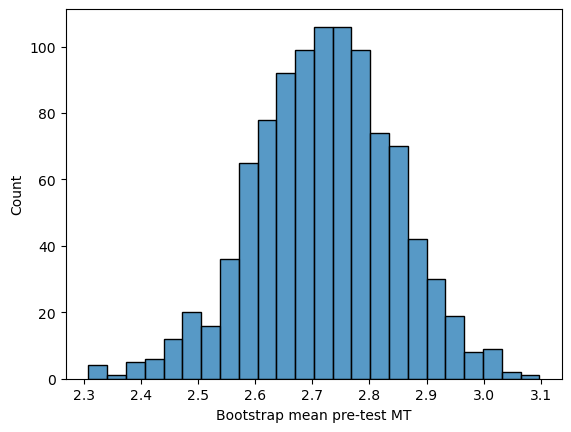

In [13]:
# 4 points for correct functions and usuage

def bootstrap(data, N, fcn, numIter = 1000):
    it = 0 ## setting the iteration variable to zero. It will be increased each time a loop is executed
    stats = np.array(range(numIter), dtype = 'float64') ## initializing the stats array (the function output)
    while it < numIter:
        sample = np.random.choice(data, size = N, replace = True) ## Generates a random sample from a given 1-D array 
        stats[it] = fcn(sample)  
        it = it + 1
    return stats

def confidenceInt(data, prec):
    lp = (100 - prec)/2
    Int = [np.percentile(data, lp), np.percentile(data, 100-(lp/2))]
    return Int

bootstrap_means = bootstrap(D.MT_pre,24,np.mean,numIter=1000)
sb.histplot(bootstrap_means)
plt.xlabel('Bootstrap mean pre-test MT')
CI = confidenceInt(bootstrap_means,95)
print(f'The 95% CI was {CI[0]:0.3f}s - {CI[1]:0.3f}s')

The True population mean lies in this interval with a probability of ~0.95 (2pts) 

The population is the undergrad population of UCL (2pts) 

**that can perform better than 3.6s** (2pts). 

This is because all participants that performed worse were not admitted to the study. This is an considerable number (15 vs. 24), so the population mean across all students is likely considerably lower. 

### Question 3.2 (10 pts)
Now the population parameter we are interested in is the minimal time that the best UCL undergrad student (without specific training) can perform at the pre-test. 

First report the minimal value in the sample. (1pts) 

Then use a bootstrap analysis to plot a bootstrap sample distribution for the minimal value. (2pts)  

*Written answer*: Describe the shape of this distribution (2 pts)

Finally use the  percentile method (as in question 3.1) to obtain a 95% confidence interval for the population parameter. (2 pts)

*Written answer*: Give a reasons why this Confidence interval that you constructed is most likely incorrect. (3pts)

In [14]:
print(f'The minimal MT at pretest was {D.MT_pre.min():0.3f}s') # (1 pt)

The minimal MT at pretest was 1.600s


<AxesSubplot:ylabel='Count'>

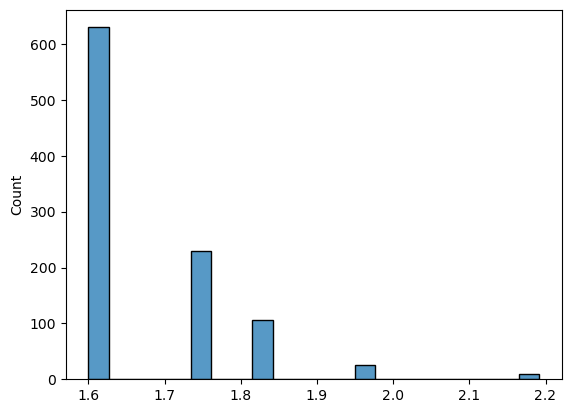

In [15]:
bootstrap_mins = bootstrap(D.MT_pre,24,np.min,numIter=1000) #2pts
sb.histplot(bootstrap_mins)


The distribution is strongly right skewed (2pts)

In [16]:
# 2 pts
CI = confidenceInt(bootstrap_mins,95)
print(f'The 95% CI for the min is {CI[0]:0.3f}s - {CI[1]:0.3f}s')

The 95% CI for the min is 1.600s - 1.976s


If the minimal value in our sample is 1.6s, then the true minimum in the population is either 1.6s or lower. It certainly cannot be higher than 1.6. 
Because the sample was only 24 students from thousand of undergrad students, it is very likely that the true minimum (the population parameter) is outside of the confidence interval. (3pts)